<a href="https://colab.research.google.com/github/Patrick-Nguyen-tech/cat-and-dog-classifier/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [13]:
import os
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip -o cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 32
epochs = 25
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_do

In [14]:
import pandas as pd
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                              batch_size=batch_size,
                                                              class_mode='binary')
test_filenames=[os.path.join(test_dir,fname) for fname in os.listdir(test_dir) if fname.endswith('.jpg')]
test_df=pd.DataFrame({'filename':test_filenames})

test_data_gen = test_image_generator.flow_from_dataframe(dataframe=test_df,
                                                         x_col='filename',
                                                         y_col=None,
                                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                         batch_size=1,
                                                         shuffle=False,
                                                         class_mode=None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 validated image filenames.


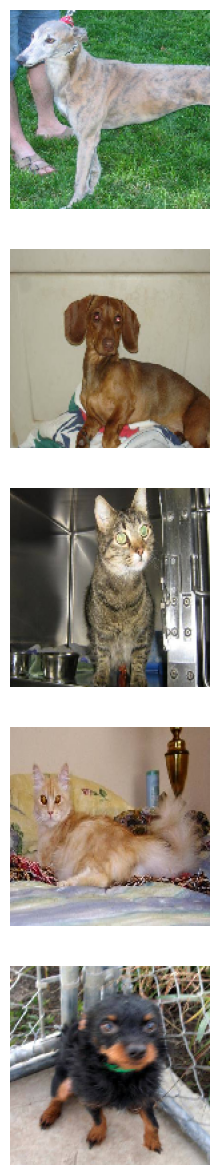

In [15]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [16]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=50,
                                           width_shift_range=.2,
                                           height_shift_range=.2,
                                           shear_range=.2,
                                           horizontal_flip=True,
                                           zoom_range=0.2,
                                           fill_mode='nearest')


Found 2000 images belonging to 2 classes.


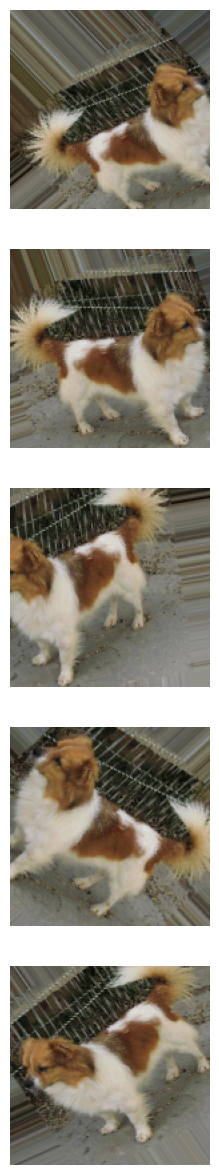

In [17]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [18]:
# 7
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    #Conv2D(64,(3,3),activation='relu'),
    #MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    #Conv2D(256,(3,3),activation='relu'),
    #MaxPooling2D(2,2),

    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5), #prevent overfitting
    Dense(1,activation='sigmoid') #binary class
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 8
history = model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

steps_per_epoch = int(np.ceil(total_train / batch_size))
validation_steps = int(np.ceil(total_val / batch_size))

history = model.fit(train_data_gen,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps = validation_steps)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.4844 - loss: 0.7762 - val_accuracy: 0.5730 - val_loss: 0.6921
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5077 - loss: 0.6939 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4952 - loss: 0.6934 - val_accuracy: 0.5680 - val_loss: 0.6916
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5149 - loss: 0.6935 - val_accuracy: 0.5470 - val_loss: 0.6881
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5395 - loss: 0.6852 - val_accuracy: 0.5950 - val_loss: 0.6600
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.5670 - loss: 0.6651 - val_accuracy: 0.6040 - val_loss: 0.6587
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5717 - loss: 0.6819 - val_accuracy: 0.6090 - val_loss: 0.6482
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5864 - loss: 0.6621 - val_accuracy: 0.6000 - v

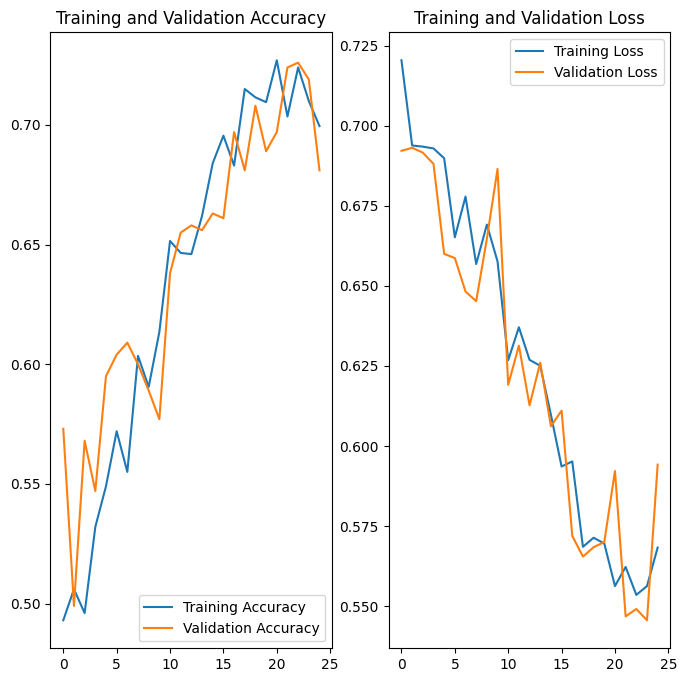

In [20]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
#10
#load and preprocess the test image
test_image_generator = ImageDataGenerator(rescale=1./255)

#use flow_from_dataframe for the test set as it doesn't have subdirectories
test_filenames= sorted([os.path.join(test_dir,fname) for fname in os.listdir(test_dir) if fname.endswith('.jpg')])
test_df=pd.DataFrame({'filename':test_filenames})

test_data_gen = test_image_generator.flow_from_dataframe(dataframe=test_df,
                                                         x_col='filename',
                                                         y_col=None, #no label for prediction
                                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                         batch_size=1,
                                                         shuffle=False,
                                                         class_mode=None) #no class mode needed for prediction

probabilities = model.predict(test_data_gen)
probabilities = probabilities.flatten()

Found 50 validated image filenames.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [22]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
